# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TravelInsurancePrediction.xls')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
df=df.drop('Unnamed: 0', axis=1) #removing uncessary variables

In [ ]:
df=df.drop_duplicates()          #removing duplicate rows
df=df.reset_index()
df=df.drop('index',axis=1)

In [ ]:
df.info()                       #checking for not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1249 non-null   int64 
 1   Employment Type      1249 non-null   object
 2   GraduateOrNot        1249 non-null   object
 3   AnnualIncome         1249 non-null   int64 
 4   FamilyMembers        1249 non-null   int64 
 5   ChronicDiseases      1249 non-null   int64 
 6   FrequentFlyer        1249 non-null   object
 7   EverTravelledAbroad  1249 non-null   object
 8   TravelInsurance      1249 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 87.9+ KB


In [ ]:
#Label Enciding by converting categorical values into )0's and 1's
df['Employment Type']=LabelEncoder().fit_transform(df['Employment Type'])   
df['GraduateOrNot']=LabelEncoder().fit_transform(df['GraduateOrNot'])
df['FrequentFlyer']=LabelEncoder().fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad']=LabelEncoder().fit_transform(df['EverTravelledAbroad'])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1244,32,0,1,900000,6,0,0,0,0
1245,27,0,1,850000,3,0,0,0,1
1246,33,1,1,1500000,4,0,1,1,1
1247,28,1,1,1750000,5,1,0,1,0


In [ ]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1249.000000,1249.000000,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,29.755805,0.701361,0.838271,9.345476e+05,4.890312,0.333066,0.236189,0.195356,0.386709
std,2.921039,0.457844,0.368350,3.607293e+05,1.762313,0.471499,0.424910,0.396634,0.487191
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.200000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Scaling on Numeric Variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=df[['Age','AnnualIncome',	'FamilyMembers']]
scaler.fit(x)
x=scaler.transform(x)
col_names = ['Age','AnnualIncome',	'FamilyMembers']
x=pd.DataFrame(x,columns=col_names)
df['Age']=x['Age']
df['AnnualIncome']=x['AnnualIncome']
df['FamilyMembers']=x['FamilyMembers']
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.426113,0,1,-1.482446,0.629929,1,0,0,0
1,0.426113,1,1,0.874835,1.197592,0,0,0,0
2,1.453557,1,1,-1.205119,-0.505398,1,0,0,1
3,-0.601330,1,1,-0.650464,-1.073061,1,0,0,0
4,-0.601330,1,1,-0.650464,1.765256,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1244,0.768594,0,1,-0.095810,0.629929,0,0,0,0
1245,-0.943811,0,1,-0.234474,-1.073061,0,0,0,1
1246,1.111076,1,1,1.568153,-0.505398,0,1,1,1
1247,-0.601330,1,1,2.261472,0.062266,1,0,1,0


In [ ]:
X=df.drop('TravelInsurance',axis=1) #predictor variables

In [ ]:
y=df['TravelInsurance']      #Target variable

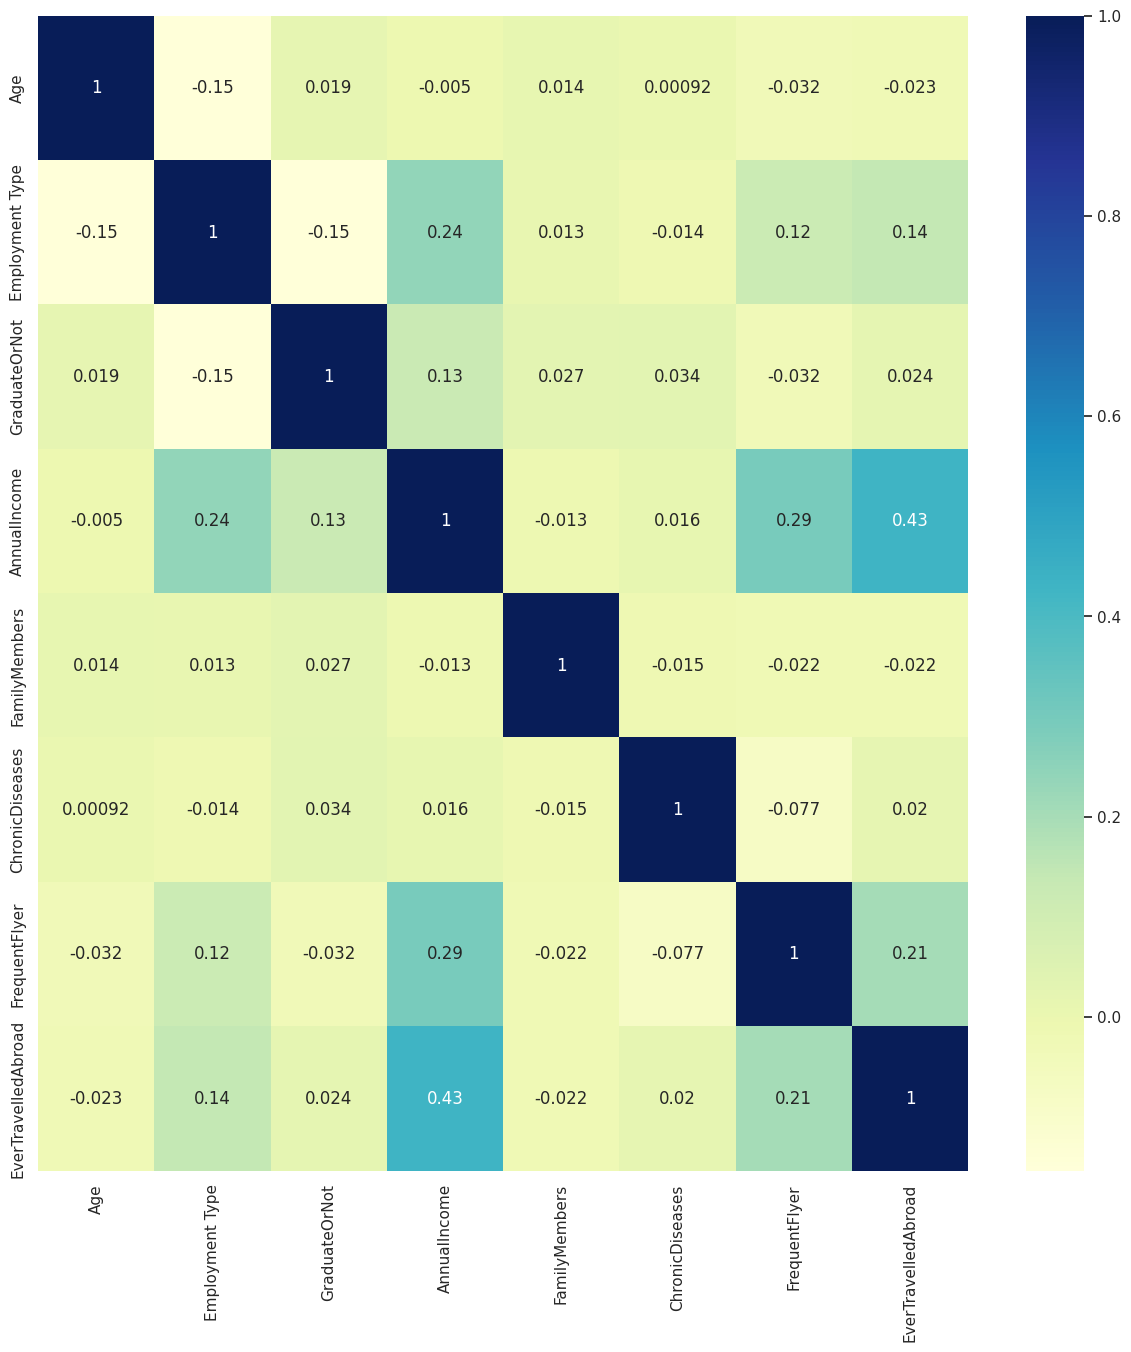

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
ax = sns.heatmap(X.corr(), cmap="YlGnBu",annot=True)
plt.show()

<Axes: xlabel='variable', ylabel='value'>

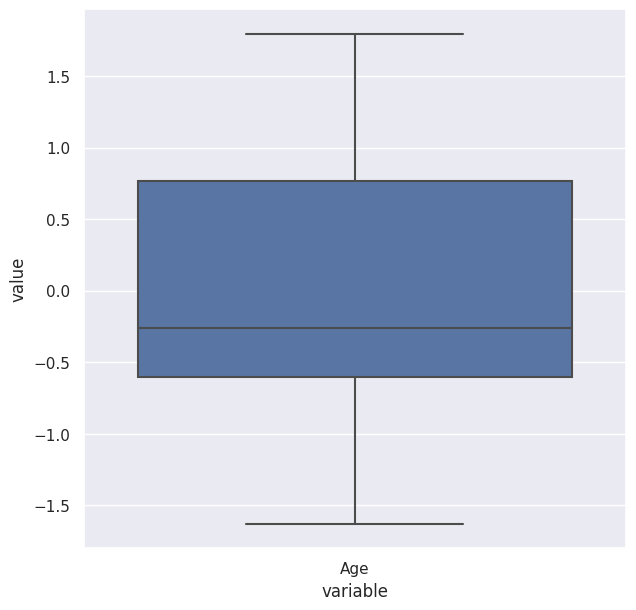

In [ ]:
dfxx=df[['Age']]
df_m = pd.melt(dfxx)
sns.set(rc = {'figure.figsize':(7,7)})
sns.boxplot(x='variable', y='value', data=df_m)

<Axes: xlabel='variable', ylabel='value'>

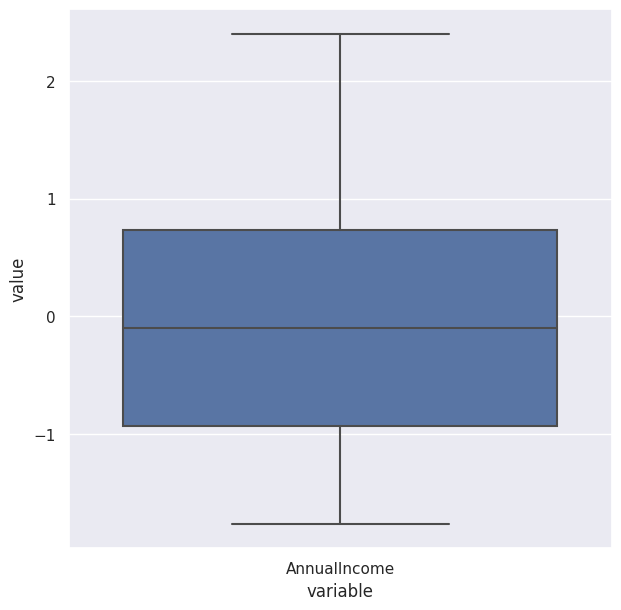

In [ ]:
dfxx=df[['AnnualIncome']]
df_m = pd.melt(dfxx)
sns.set(rc = {'figure.figsize':(7,7)})
sns.boxplot(x='variable', y='value', data=df_m)

<Axes: xlabel='variable', ylabel='value'>

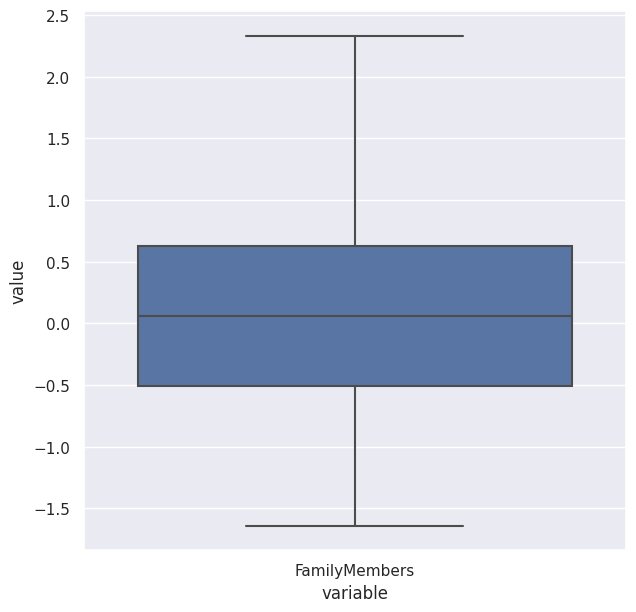

In [ ]:
dfxx=df[['FamilyMembers']]
df_m = pd.melt(dfxx)
sns.set(rc = {'figure.figsize':(7,7)})
sns.boxplot(x='variable', y='value', data=df_m)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Employment Type'}>,
        <Axes: title={'center': 'GraduateOrNot'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'FrequentFlyer'}>,
        <Axes: title={'center': 'EverTravelledAbroad'}>, <Axes: >]],
      dtype=object)

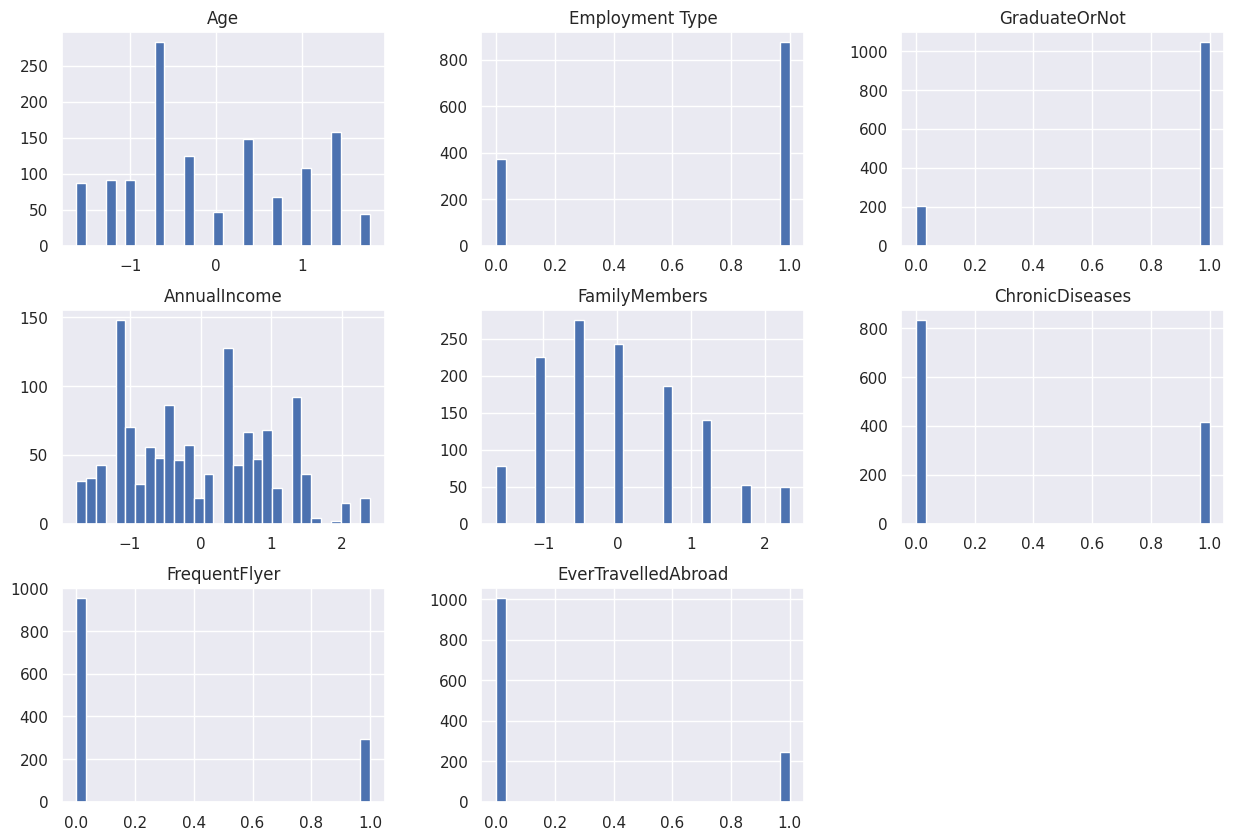

In [ ]:
X.hist(bins=30, figsize=(15, 10))

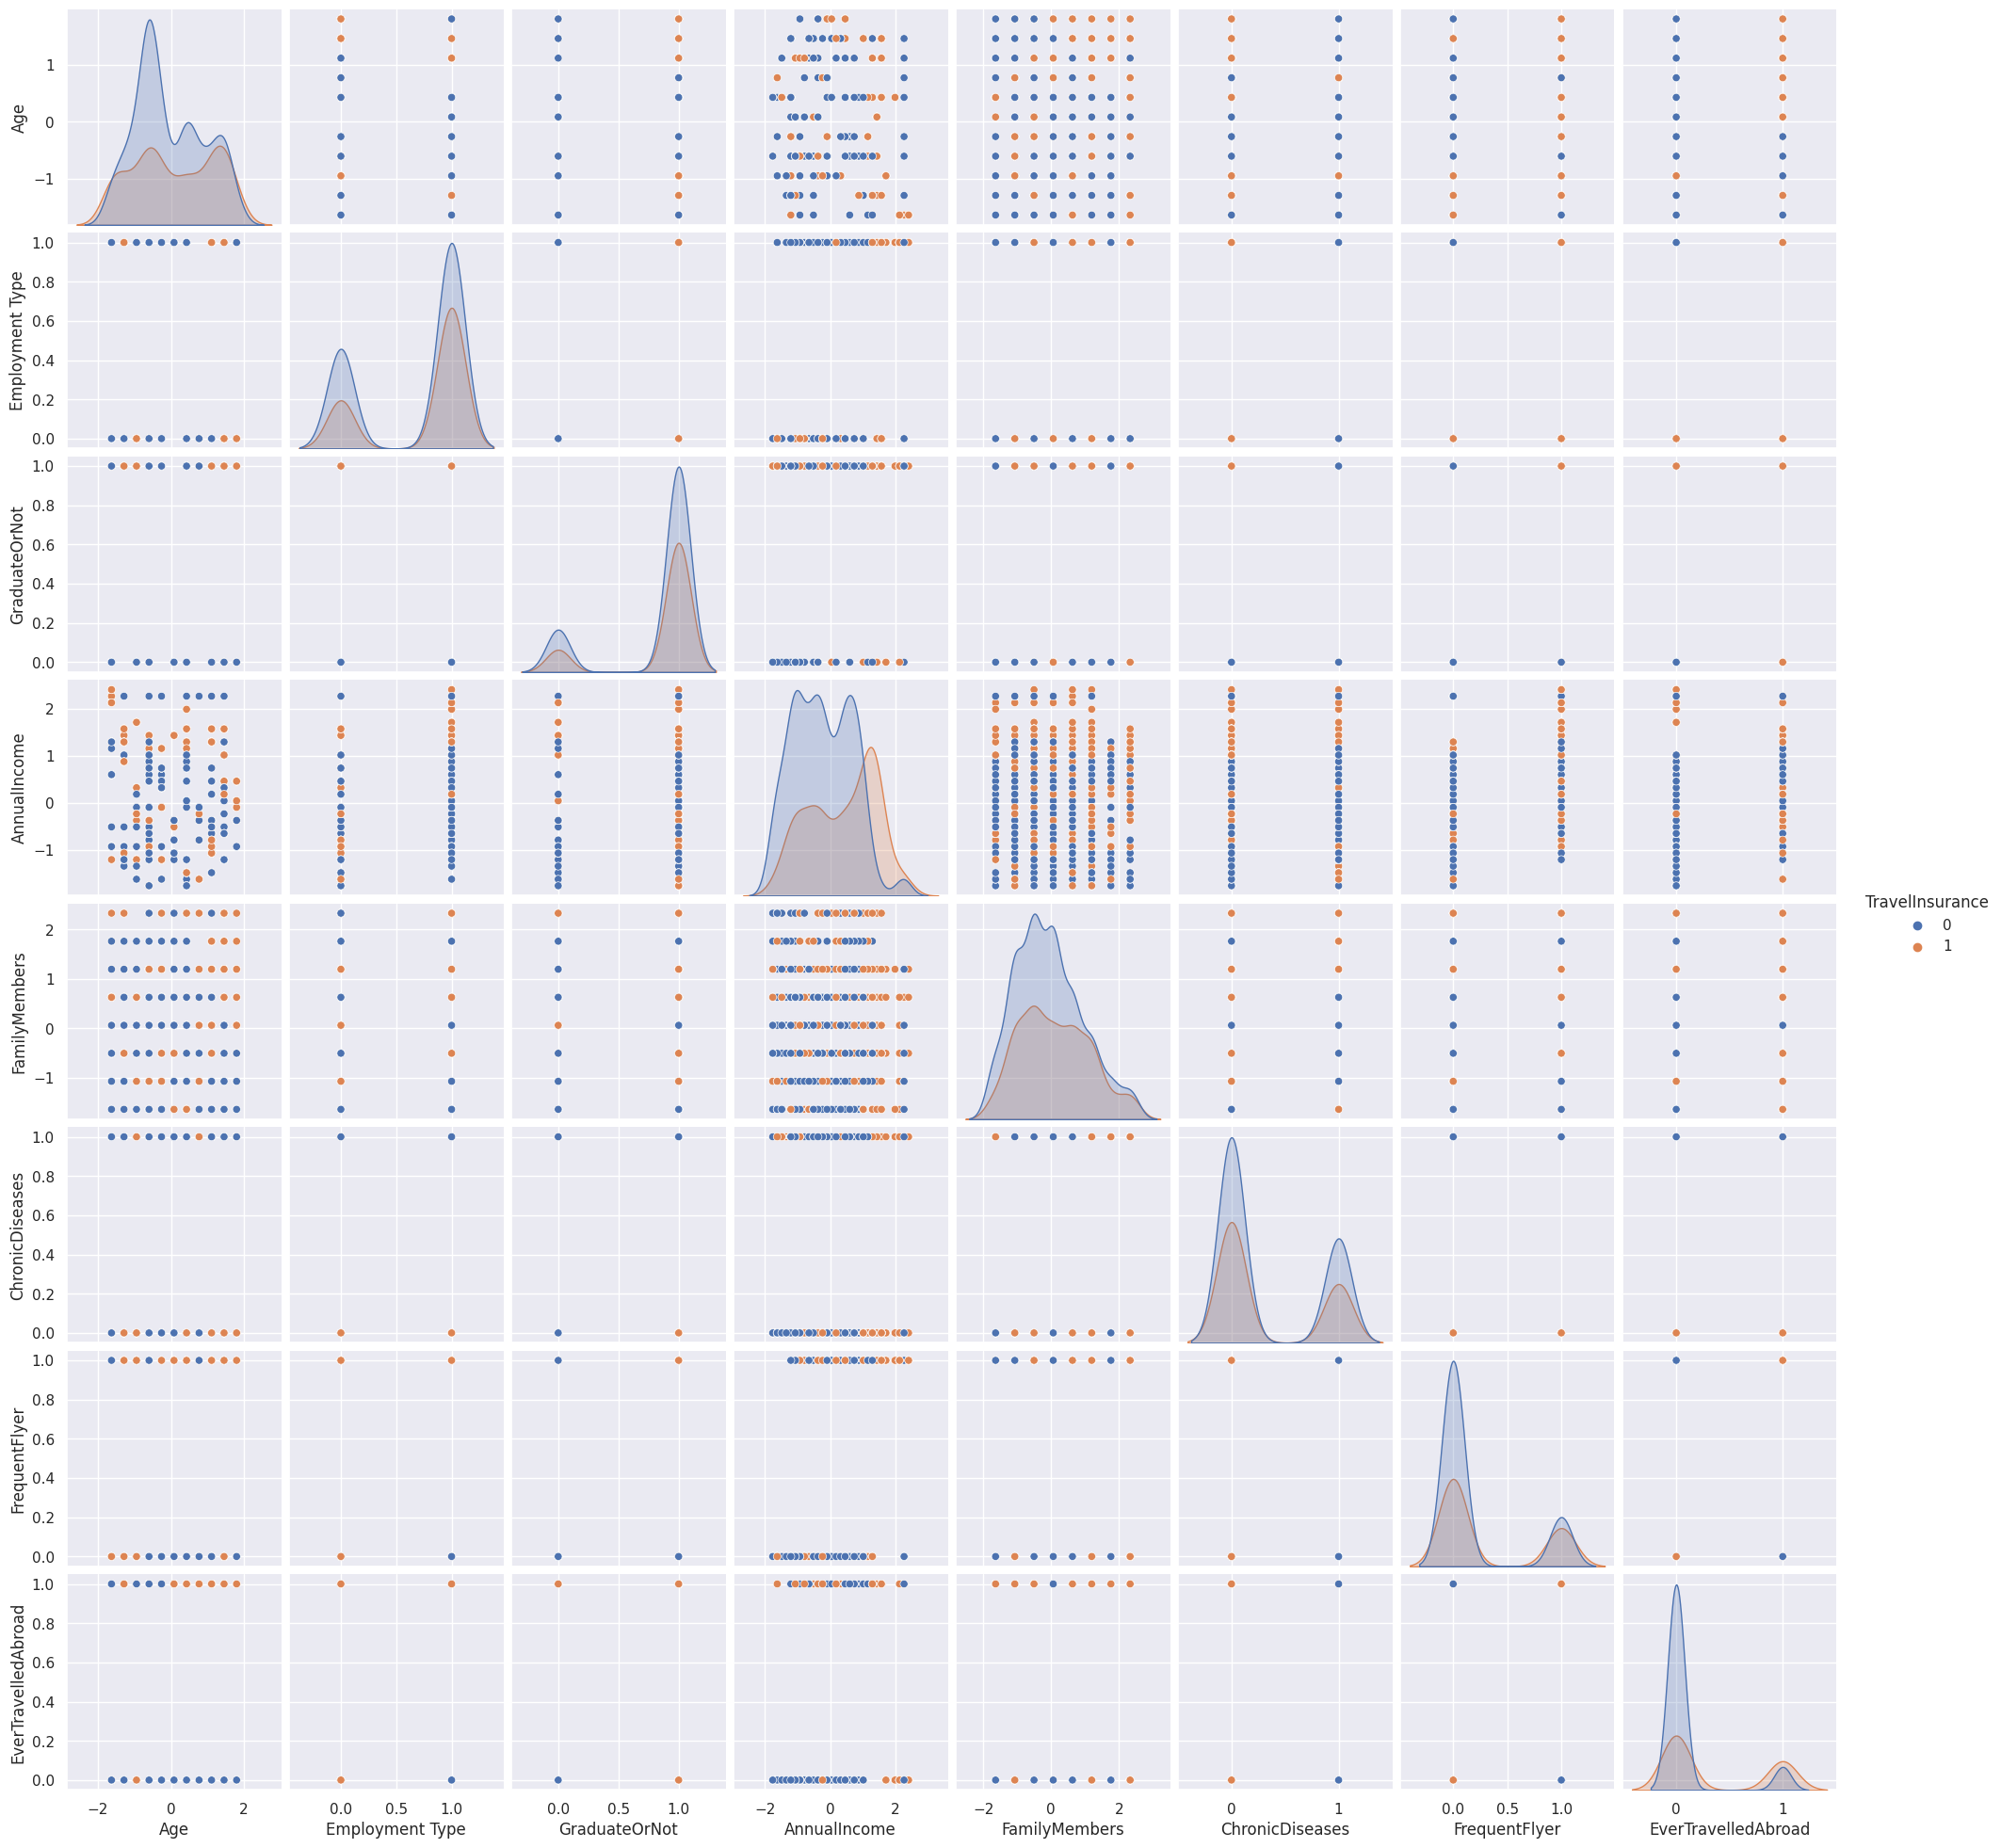

In [ ]:
sns.pairplot(data=df,hue='TravelInsurance')

CHI SQUARE TEST

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline 
contigency= pd.crosstab(df['Employment Type'],y)
contigency_pct = pd.crosstab(df['Employment Type'],y, normalize='index')
c, p, dof, expected = chi2_contingency(contigency)
p

0.008454155421443737

In [ ]:
contigency= pd.crosstab(df['GraduateOrNot'],y)
contigency_pct = pd.crosstab(df['GraduateOrNot'],y, normalize='index')
c, p, dof, expected = chi2_contingency(contigency)
p

0.2965351968551507

In [ ]:
contigency= pd.crosstab(df['ChronicDiseases'],y)
contigency_pct = pd.crosstab(df['ChronicDiseases'],y, normalize='index')
c, p, dof, expected = chi2_contingency(contigency)
p

0.7700536442454782

In [ ]:
contigency= pd.crosstab(df['FrequentFlyer'],y)
contigency_pct = pd.crosstab(df['FrequentFlyer'],y, normalize='index')
c, p, dof, expected = chi2_contingency(contigency)
p

9.20733122419198e-06

In [ ]:
contigency= pd.crosstab(df['EverTravelledAbroad'],y)
contigency_pct = pd.crosstab(df['EverTravelledAbroad'],y, normalize='index')
c, p, dof, expected = chi2_contingency(contigency)
p

4.0034414530103906e-26

POINT BISERIAL TEST

In [ ]:
from scipy.stats import pointbiserialr

pbc = pointbiserialr(df['Age'], y)
print(pbc)

SignificanceResult(statistic=0.06753605640189288, pvalue=0.016979982984617368)


In [ ]:
pbc = pointbiserialr(df['AnnualIncome'], y)
print(pbc)

SignificanceResult(statistic=0.29391272933756324, pvalue=2.618533920718333e-26)


In [ ]:
pbc = pointbiserialr(df['FamilyMembers'], y)
print(pbc)

SignificanceResult(statistic=0.08490728303739495, pvalue=0.0026720539558228113)


# **Data Partition**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Before PCA**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

0.6996805111821086
[[174  18]
 [ 76  45]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

Accuracy: 0.6996805111821086
Validation Error: 0.3003194888178914
Sensitivity: 0.7142857142857143
Specificity: 0.90625
MAE:  0.3003194888178914
RMSE: 0.5480141319508935
R2 score: -0.26644283746556474
F1 score: 0.48913043478260865


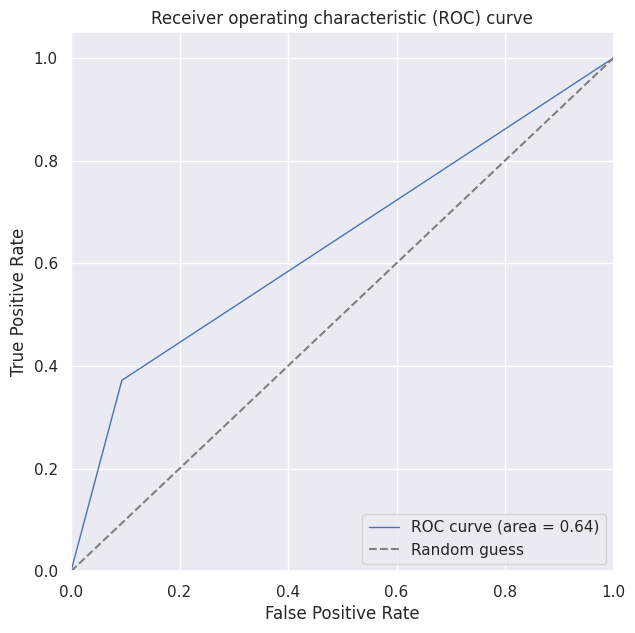

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
print('Model score:', score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.6741214057507987
[[163  29]
 [ 73  48]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.6741214057507987
Validation Error: 0.3258785942492013
Sensitivity: 0.6233766233766234
Specificity: 0.8489583333333334
MAE:  0.3258785942492013
RMSE: 0.5708577705954446
R2 score: -0.3742252066115701
F1 score: 0.48484848484848486


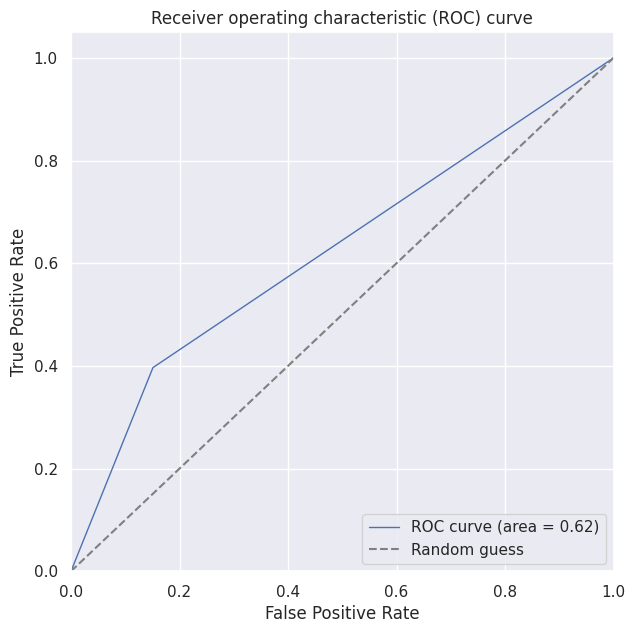

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x=1
s=0
score_list = []
for i in range (1,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score = knn.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
knn = KNeighborsClassifier(n_neighbors=x)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(' N_neighbours', x)
print(s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

 N_neighbours 21
0.7635782747603834
[[181  11]
 [ 63  58]]


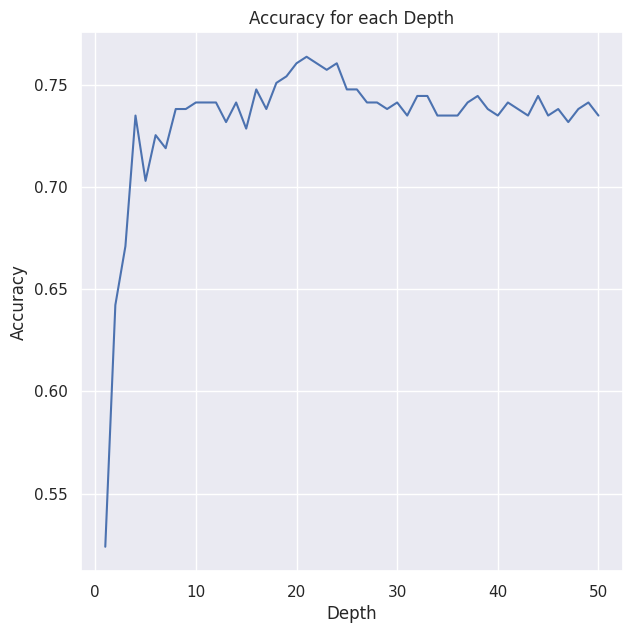

In [ ]:
l = range(1, 51)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

# Calculating specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)
# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7635782747603834
Validation Error: 0.23642172523961658
Sensitivity: 0.8405797101449275
Specificity: 0.9427083333333334
MAE:  0.2364217252396166
RMSE: 0.48623217215607667
R2 score: 0.0030130853994491114
F1 score: 0.6105263157894737


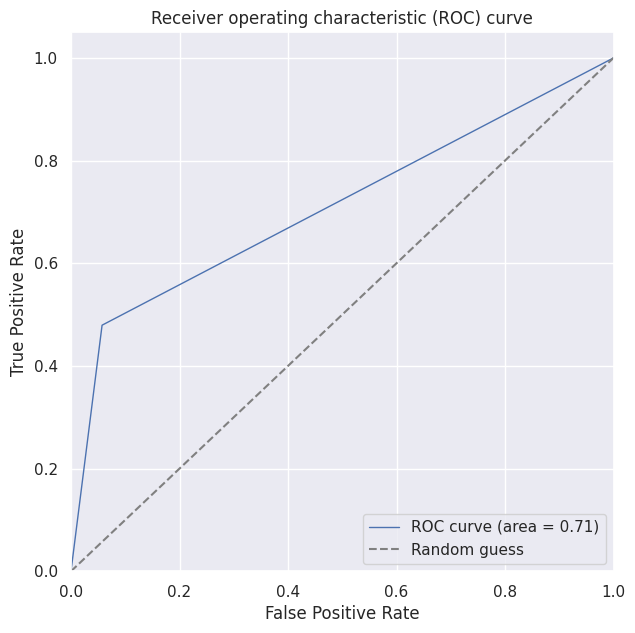

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Neural Network - MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=50)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
Score = clf.score(X_test, y_test)
print('Model score:', Score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.7284345047923323
[[174  18]
 [ 67  54]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7284345047923323
Validation Error: 0.2715654952076677
Sensitivity: 0.75
Specificity: 0.90625
MAE:  0.2715654952076677
RMSE: 0.5211194634703905
R2 score: -0.14518767217630857
F1 score: 0.5595854922279793


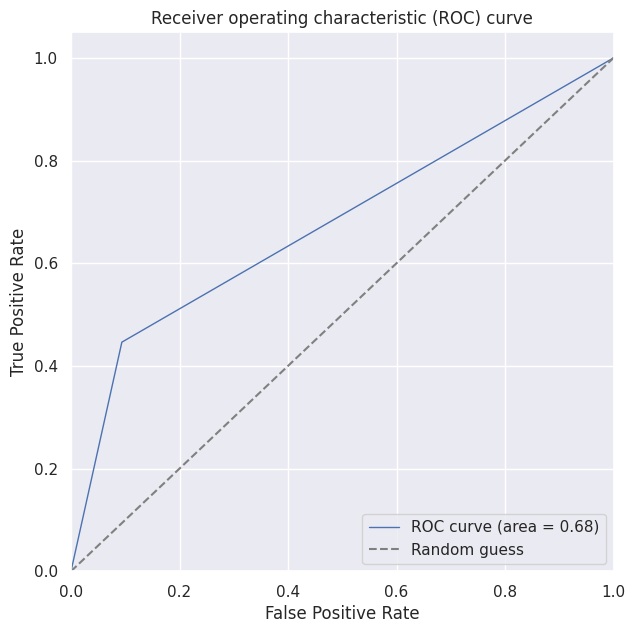

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **SVC**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.670926517571885


In [ ]:
svm = SVC(kernel='sigmoid', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.48242811501597443


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.7476038338658147
[[176  16]
 [ 63  58]]


In [ ]:
svm = SVC(kernel='poly', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.7507987220447284


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7507987220447284
Validation Error: 0.24920127795527158
Sensitivity: 0.8307692307692308
Specificity: 0.9427083333333334
MAE:  0.24920127795527156
RMSE: 0.49920063897722683
R2 score: -0.05087809917355357
F1 score: 0.5806451612903226


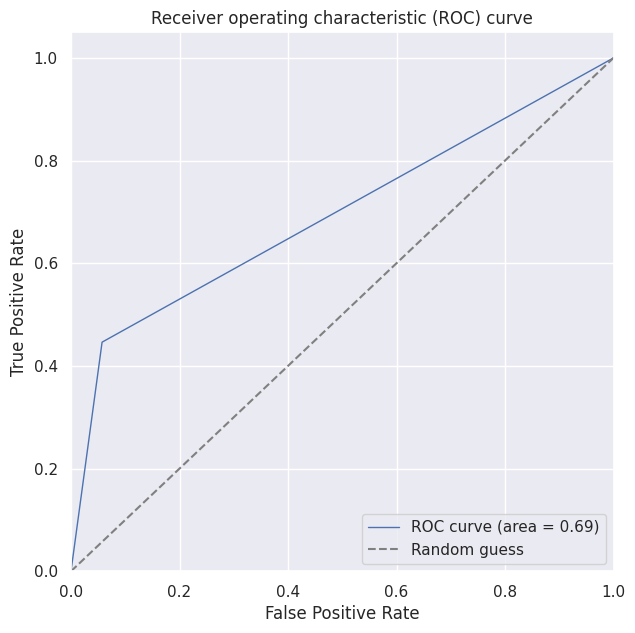

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x=1
y=1
s=0
score_list=[]
for i in range(1,101):
  for j in range(1,51):
    rf = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = rf.score(X_test, y_test)
    if(score>s):
      s=score
      x=i
      y=j
  score_list.append(score)
rf = RandomForestClassifier(n_estimators=x, max_depth=y, random_state=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print('est', x)
print('dep', y)
print('Model score:', s)

confusion= confusion_matrix(y_test, y_pred)
print(confusion)

est 17
dep 6
Model score: 0.7763578274760383
[[185   7]
 [ 63  58]]


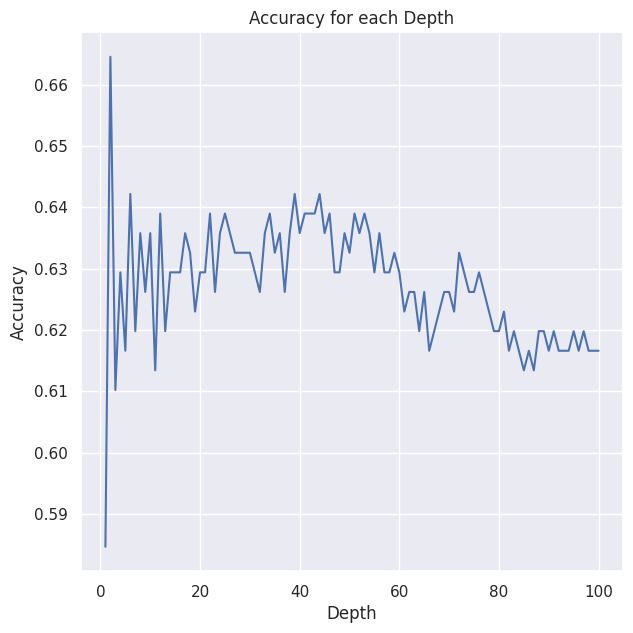

In [ ]:
l=range(1, 101)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7763578274760383
Validation Error: 0.22364217252396168
Sensitivity: 0.8923076923076924
Specificity: 0.9635416666666666
MAE:  0.22364217252396165
RMSE: 0.4729082072918186
R2 score: 0.056904269972451904
F1 score: 0.6236559139784946


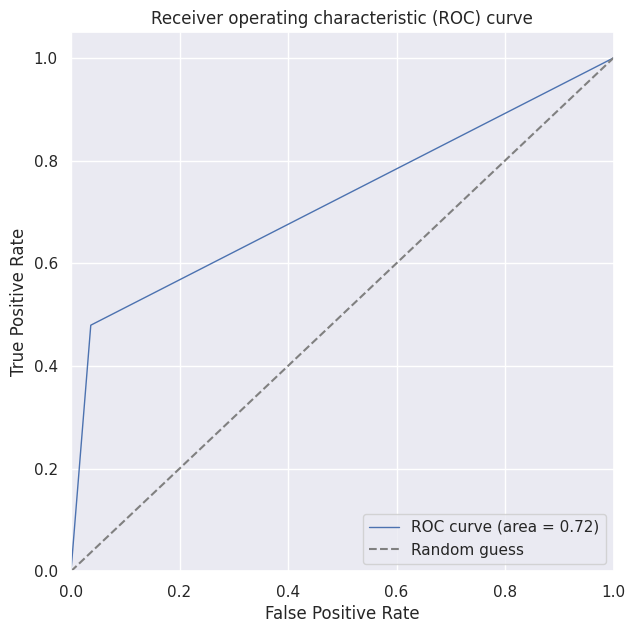

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
x=1
s=0
score_list=[]
for i in range(1,101):
  model = AdaBoostClassifier(n_estimators=i, learning_rate=1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
model = AdaBoostClassifier(n_estimators=x, learning_rate=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('est', x)
print('Model score:', s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

est 17
Model score: 0.7603833865814696
[[184   8]
 [ 80  41]]


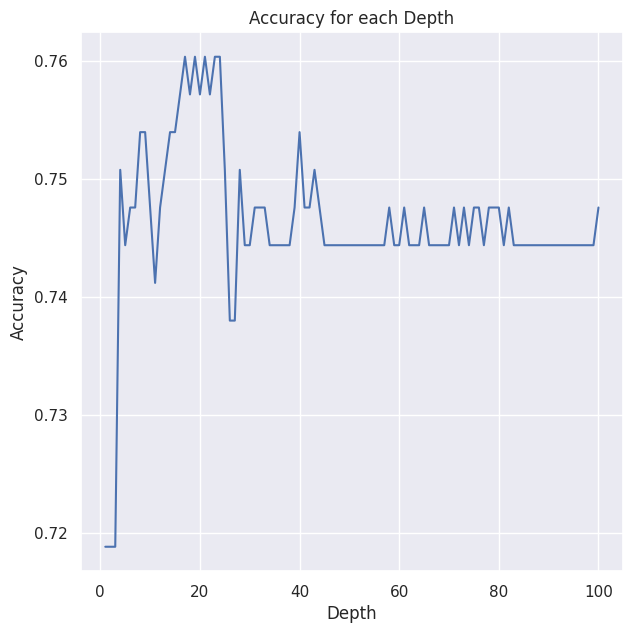

In [ ]:
l=range(1, 101)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7603833865814696
Validation Error: 0.23961661341853036
Sensitivity: 0.859375
Specificity: 0.953125
MAE:  0.23961661341853036
RMSE: 0.4895064998736282
R2 score: -0.010459710743801587
F1 score: 0.5945945945945946


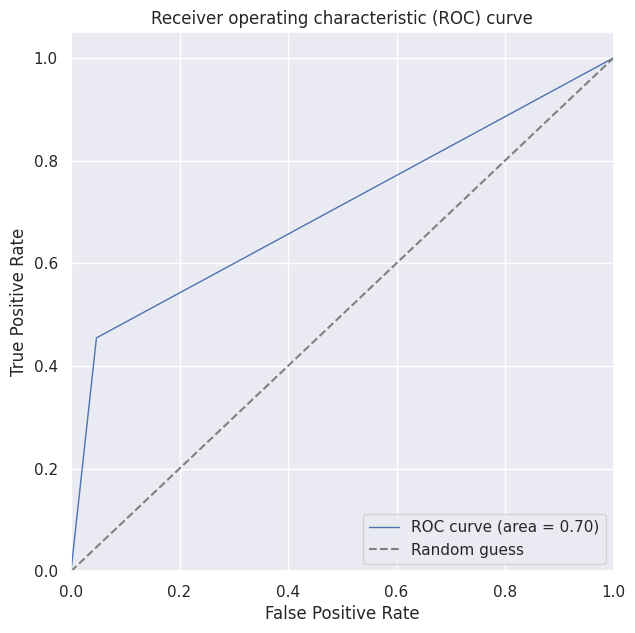

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x=1
s=0
score_list=[]
for i in range(1,51):
  dt = DecisionTreeClassifier(max_depth=i, random_state=1)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = dt.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
dt = DecisionTreeClassifier(max_depth=x, random_state=y)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = dt.score(X_test, y_test)
print(' Max depth', x)
print('Model score:', s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

 Max depth 3
Model score: 0.7763578274760383
[[185   7]
 [ 63  58]]


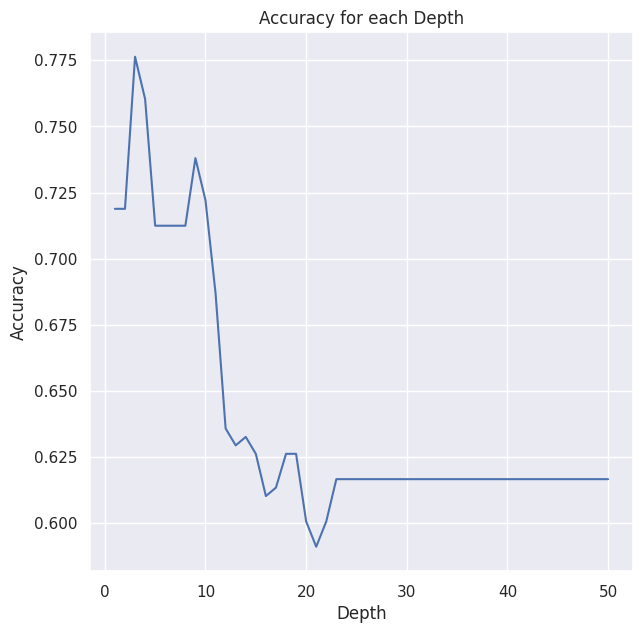

In [ ]:
l=range(1, 51)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7763578274760383
Validation Error: 0.22364217252396168
Sensitivity: 0.8923076923076924
Specificity: 0.9635416666666666
MAE:  0.22364217252396165
RMSE: 0.4729082072918186
R2 score: 0.056904269972451904
F1 score: 0.6236559139784946


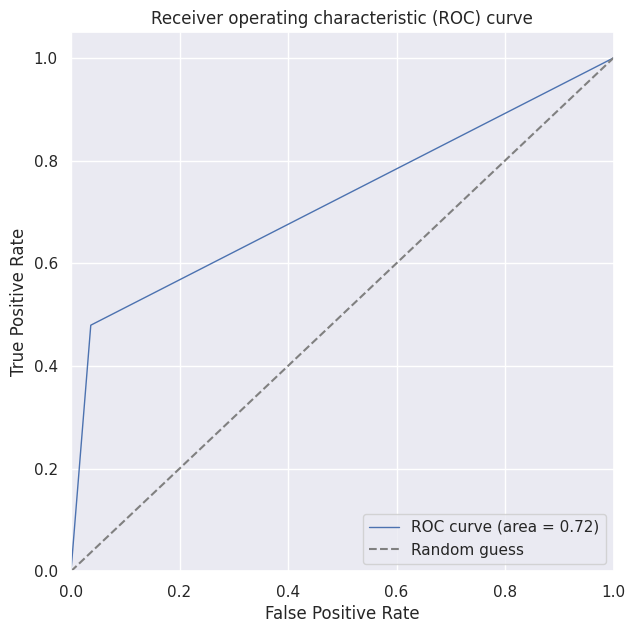

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


# After PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df.drop('TravelInsurance',axis=1))
pca_columns = ['PC1', 'PC2', 'PC3']
x_pca_df = pd.DataFrame(data=x_pca, columns=pca_columns)
x_pca_df

,PC1,PC2,PC3
0,-1.739881,0.163216,0.185691
1,0.386223,1.302937,0.673036
2,-1.377473,0.320454,-1.281994
3,-0.203733,-1.313704,-0.434702
4,-0.682832,0.403052,1.767204
...,...,...,...
1244,-0.594347,0.890381,-0.034400
1245,0.112967,-1.407099,-0.276148
1246,1.518844,1.119949,-1.082855
1247,2.343617,0.417872,0.417825


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_pca_df, df['TravelInsurance'], test_size=0.25, random_state=42)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

0.6932907348242812
[[167  25]
 [ 71  50]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

Accuracy: 0.6932907348242812
Validation Error: 0.30670926517571884
Sensitivity: 0.6666666666666666
Specificity: 0.8697916666666666
MAE:  0.30670926517571884
RMSE: 0.5538133847928549
R2 score: -0.29338842975206614
F1 score: 0.5102040816326531


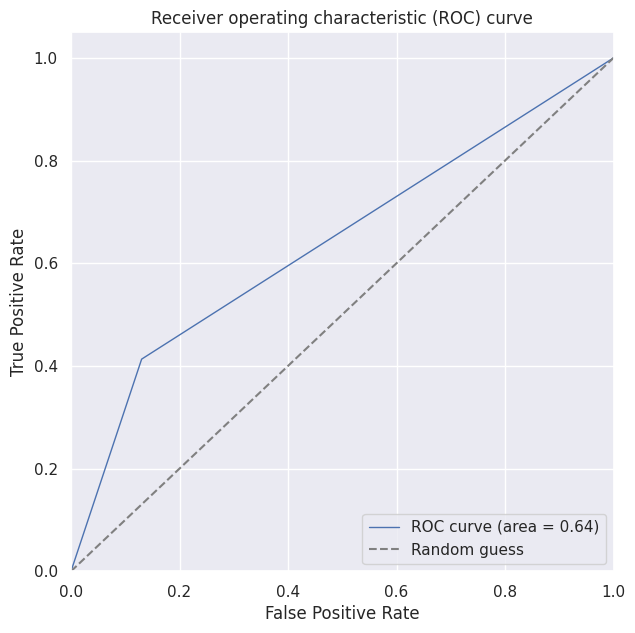

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
print('Model score:', score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.7284345047923323
[[174  18]
 [ 67  54]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7284345047923323
Validation Error: 0.2715654952076677
Sensitivity: 0.75
Specificity: 0.90625
MAE:  0.2715654952076677
RMSE: 0.5211194634703905
R2 score: -0.14518767217630857
F1 score: 0.5595854922279793


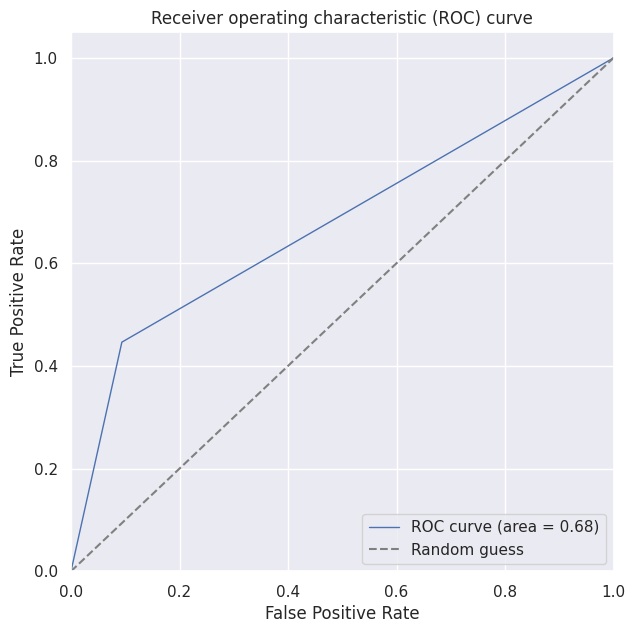

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x=1
s=0
score_list = []
for i in range (1,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score = knn.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
knn = KNeighborsClassifier(n_neighbors=x)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(' N_neighbours', x)
print(s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

 N_neighbours 19
0.7507987220447284
[[181  11]
 [ 67  54]]


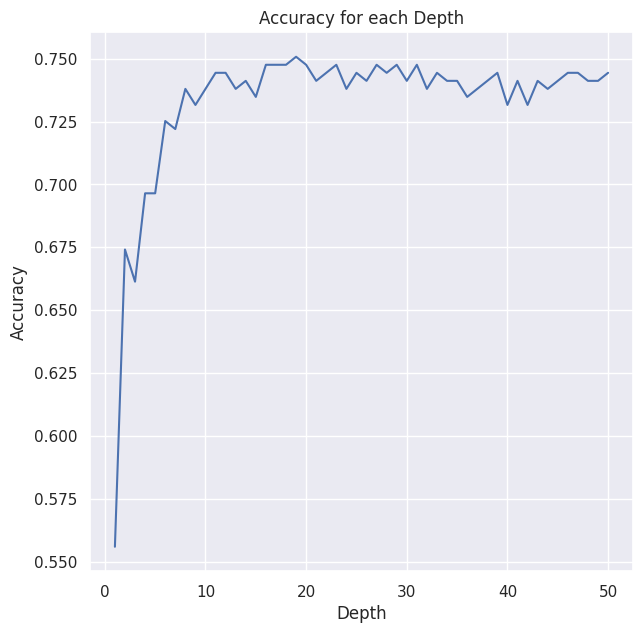

In [ ]:
l = range(1, 51)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

# Calculating specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)
# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7507987220447284
Validation Error: 0.24920127795527158
Sensitivity: 0.8307692307692308
Specificity: 0.9427083333333334
MAE:  0.24920127795527156
RMSE: 0.49920063897722683
R2 score: -0.05087809917355357
F1 score: 0.5806451612903226


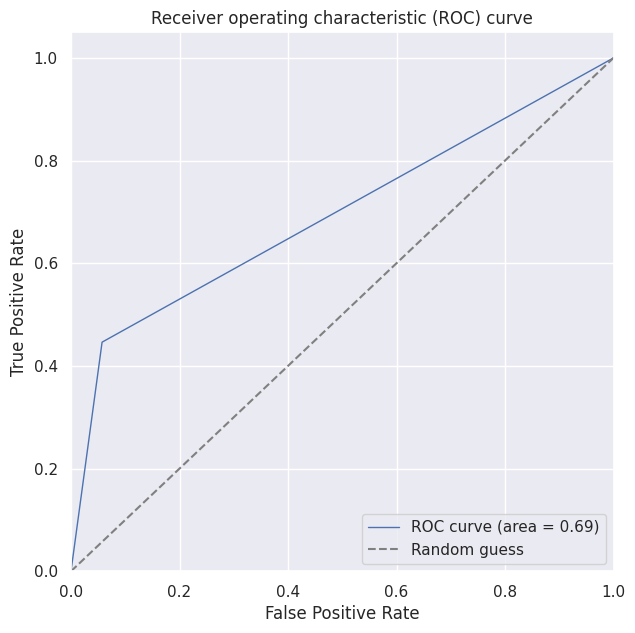

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Neural Network - MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=50)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
Score = clf.score(X_test, y_test)
print('Model score:', Score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.7539936102236422
[[180  12]
 [ 65  56]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7539936102236422
Validation Error: 0.2460063897763578
Sensitivity: 0.8235294117647058
Specificity: 0.9375
MAE:  0.24600638977635783
RMSE: 0.49599031217994355
R2 score: -0.03740530303030298
F1 score: 0.5925925925925926


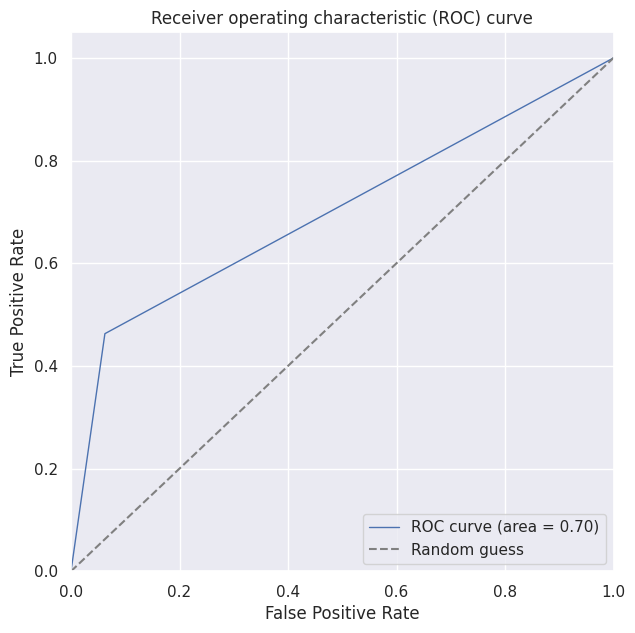

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **SVC**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.6900958466453674


In [ ]:
svm = SVC(kernel='poly', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.7124600638977636


In [ ]:
svm = SVC(kernel='sigmoid', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)

Model score: 0.5175718849840255


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)
print('Model score:', score)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

Model score: 0.7476038338658147
[[178  14]
 [ 65  56]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7476038338658147
Validation Error: 0.25239616613418525
Sensitivity: 0.8
Specificity: 0.9270833333333334
MAE:  0.2523961661341853
RMSE: 0.5023904518740233
R2 score: -0.06435089531680438
F1 score: 0.5863874345549739


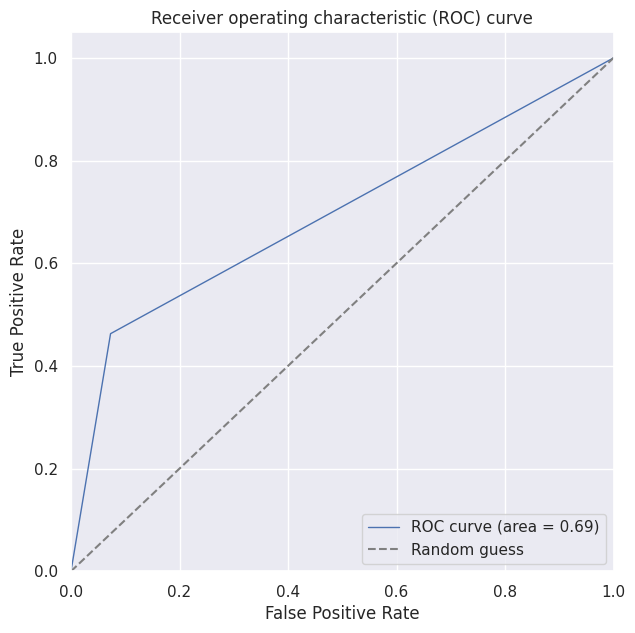

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x=1
y=1
s=0
score_list=[]
for i in range(1,101):
  for j in range(1,51):
    rf = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = rf.score(X_test, y_test)
    if(score>s):
      s=score
      x=i
      y=j
  score_list.append(score)
rf = RandomForestClassifier(n_estimators=x, max_depth=y, random_state=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print('est', x)
print('dep', y)
print('Model score:', s)

confusion= confusion_matrix(y_test, y_pred)
print(confusion)

est 5
dep 4
Model score: 0.7380191693290735
[[178  14]
 [ 68  53]]


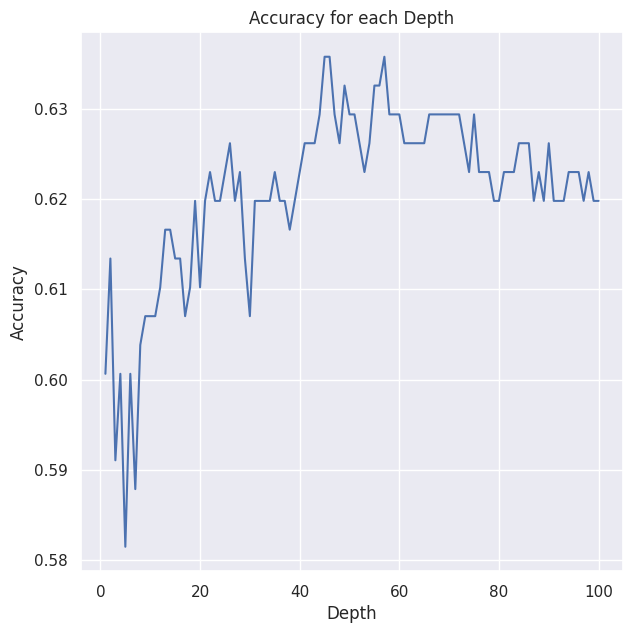

In [ ]:
l=range(1, 101)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7380191693290735
Validation Error: 0.2619808306709265
Sensitivity: 0.7910447761194029
Specificity: 0.9270833333333334
MAE:  0.26198083067092653
RMSE: 0.5118406301486104
R2 score: -0.10476928374655636
F1 score: 0.5638297872340425


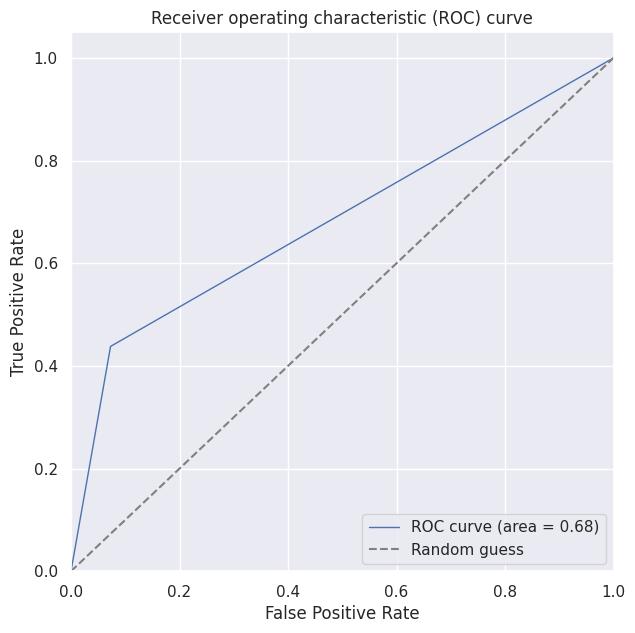

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
x=1
s=0
score_list=[]
for i in range(1,101):
  model = AdaBoostClassifier(n_estimators=i, learning_rate=1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
model = AdaBoostClassifier(n_estimators=x, learning_rate=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('est', x)
print('Model score:', s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

est 6
Model score: 0.7252396166134185
[[ 11 181]
 [ 32  89]]


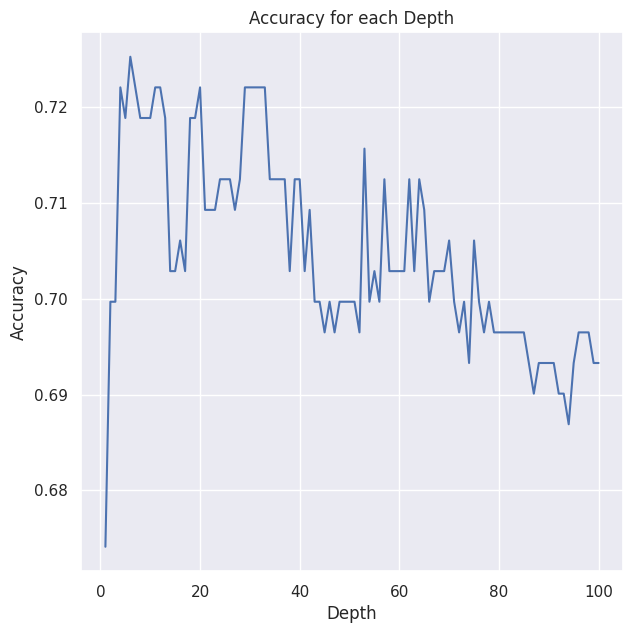

In [ ]:
l=range(1, 101)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.3194888178913738
Validation Error: 0.6805111821086263
Sensitivity: 0.3296296296296296
Specificity: 0.057291666666666664
MAE:  0.6805111821086262
RMSE: 0.824931016575705
R2 score: -1.8697055785123964
F1 score: 0.4552429667519182


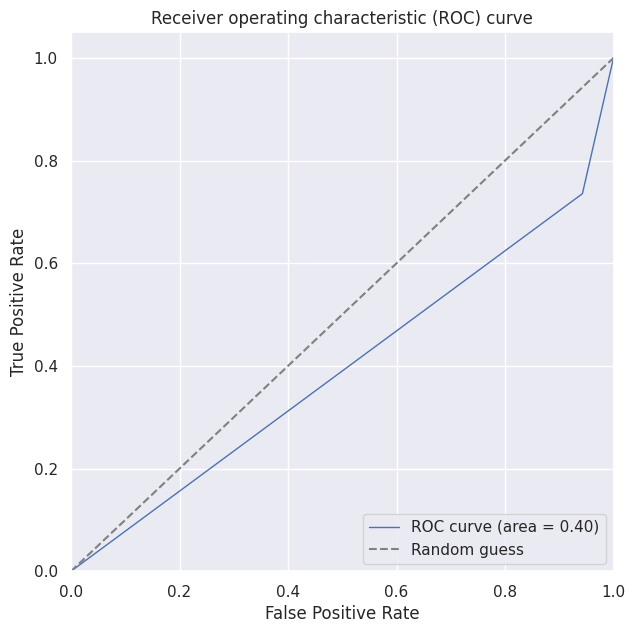

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x=1
s=0
score_list=[]
for i in range(1,51):
  dt = DecisionTreeClassifier(max_depth=i, random_state=1)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = dt.score(X_test, y_test)
  score_list.append(score)
  if(score>s):
    s=score
    x=i
dt = DecisionTreeClassifier(max_depth=x, random_state=y)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = dt.score(X_test, y_test)
print(' Max depth', x)
print('Model score:', s)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

 Max depth 2
Model score: 0.7220447284345048
[[180  12]
 [ 75  46]]


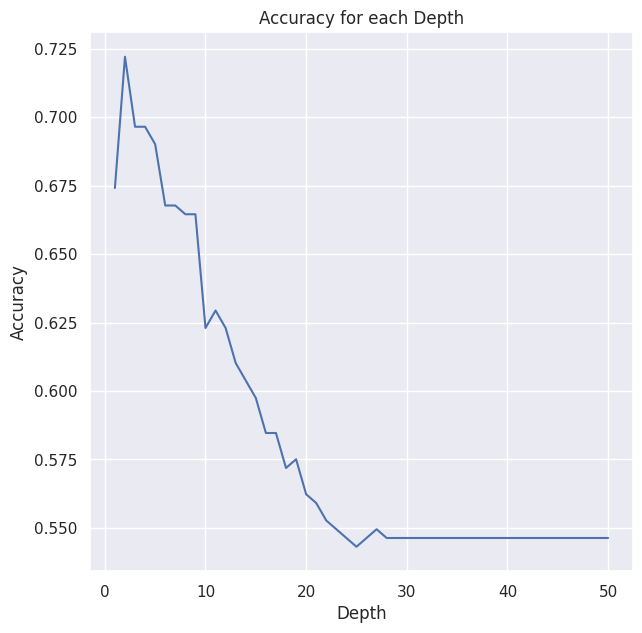

In [ ]:
l=range(1, 51)
plt.plot(l, score_list)
plt.title('Accuracy for each Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
validation_error = 1 - accuracy
print("Validation Error:", validation_error)

sensitivity=tp/(tp+fp)
print("Sensitivity:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ",mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


Accuracy: 0.7220447284345048
Validation Error: 0.27795527156549515
Sensitivity: 0.7931034482758621
Specificity: 0.9375
MAE:  0.2779552715654952
RMSE: 0.5272146351966106
R2 score: -0.17213326446280974
F1 score: 0.5139664804469273


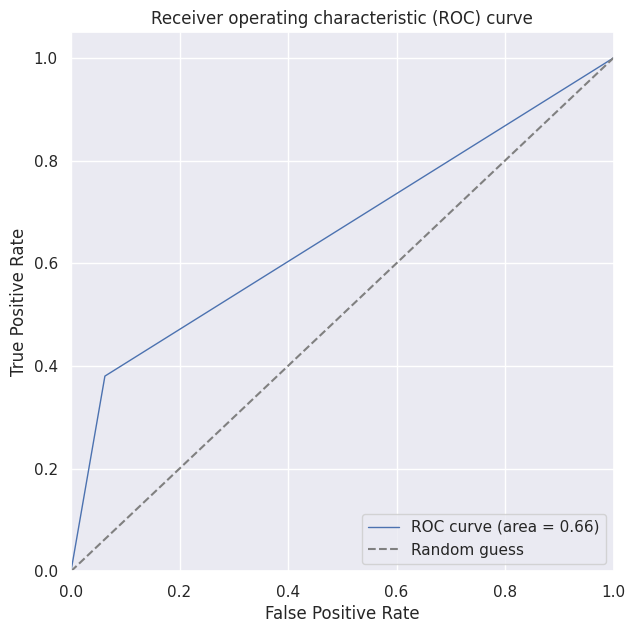

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
